**Dataset:**
personality type data (Lab 2 - Personality Profile Type.csv)

**Objective:**
classify Personality type as one of the following **using RNNs**. <br>
['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']

**Evaluation metric:**
Precision

### Import used libraries

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', 500)

In [2]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
 nltk.download('punkt') #tokenizing

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
from sklearn.base import BaseEstimator, TransformerMixin
import re

In [5]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [6]:
pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 10.1 MB/s eta 0:00:00


In [7]:
import contractions

### Load Dataset

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
data = pd.read_csv('/content/drive/My Drive/Lab 2 - Personality Profile Type.csv')
data.head(10)

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments https://www.youtube.com/watch?v=iz7lE1g4XM4 sportscenter not top ten plays https://www.youtube.com/watch?v=uCdfze1etec pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8 http://www.youtube.com/watch?v=u8ejam5DP3E On repeat for most of today.|||May the PerC Experience immerse you.|||The last ...
1,ENTP,'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There isn't enough...|||Giving new meaning to 'Game' theory.|||Hello *ENTP Grin* That's all it takes. Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins.|||This...
2,INTP,"'Good one _____ https://www.youtube.com/watch?v=fHiGbolFFGw|||Of course, to which I say I know; that's my blessing and my curse.|||Does being absolutely positive that you and your best friend could be an amazing couple count? If so, than yes. Or it's more I could be madly in love in case I reconciled my feelings (which at...|||No, I didn't; thank you for a link!|||So-called Ti-Si loop (and it can stem from any current topic/obsession) can be deadly. It's like when you're stuck in your o..."
3,INTJ,"'Dear INTP, I enjoyed our conversation the other day. Esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created...|||Dear ENTJ sub, Long time no see. Sincerely, Alpha|||None of them. All other types hurt in deep existential ways that I want no part of.|||Probably a sliding scale that depends on individual preferences, like everything in humanity.|||Draco Malfoy also. I'd say he's either 358 or 368.|||I'm either 358..."
4,ENTJ,'You're fired.|||That's another silly misconception. That approaching is logically is going to be the key to unlocking whatever it is you think you are entitled to. Nobody wants to be approached with BS...|||But guys... he REALLY wants to go on a super-duper-long-ass vacation. C'mon guys. His boss just doesn't listen or get it. He even approached him logically and everything.|||Never mind. Just go on permanent vacation.|||Two months? I wouldn't be crazy about the idea. If you are really hi...
5,INTJ,"'18/37 @.@|||Science is not perfect. No scientist claims that it is, or that scientific information will not be revised as we discover new things. Rational thinking has been very useful to our society....|||INFP- Edgar Allen Poe was an INFP and he's in your siggy.|||People see the obvious Fi and are quick to put her as INFP. I agree that she has no Ne. I see her as an ISFP. Compare her to Haku (definite INFP). She is flat through most of Naruto.. but I don't...|||Lets get this party star..."
6,INFJ,"'No, I can't draw on my own nails (haha). Those were done by professionals on my nails. And yes, those are all gel. You mean those you posted were done by yourself on your own nails? Awesome!|||Probably the Electronic Screen Syndrome. With the advent of technology and social media, we all suffer from overstimulation on a daily basis. I'm guilty as well. In the past, I can be happy just...|||I love nail arts too! These are some of mine: 718282 718290 718298 718306 718314|||This is the first..."
7,INTJ,"'I tend to build up a collection of things on my desktop that i use frequently and then move them into a folder called 'Everything' from there it get sorted into type and sub type|||i ike to collect odd objects, even at work...a lot of people would call it junk but i like to collect it. Old unused software? ill take that off your hands :) i have a bunch of old adobe...|||i think its quite normal, i tend to only see my friends in real life every c

### Data splitting

In [10]:
data.columns

Index(['type', 'posts'], dtype='object')

In [11]:
data.shape

(8675, 2)

In [12]:
from sklearn.model_selection import train_test_split

x = data[['posts']]
y = data[['type']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
x_train.shape

(6940, 1)

In [14]:
y_train.shape

(6940, 1)

### EDA on training data

- check NaNs

In [15]:
training_data = pd.concat([x_train, y_train], axis = 1)

In [16]:
training_data.isnull().sum()

posts    0
type     0
dtype: int64

- check duplicates

In [17]:
training_data.duplicated().sum()

0

- show a representative sample of data texts to find out required preprocessing steps

In [18]:
sample_tweets = training_data['posts'].sample(n=100)
for tweet in sample_tweets:
    print(tweet)
    print("-" *100)


'right, haha I do the same :D|||mystikro What did you do then?|||InsanityRemix  so you did try before, just after many failed trials, you learned hopelessness and kind of giving up on it, but let others to approach you instead. I think the most important thing...|||InsanityRemix So you don't initiate anything at all? always wait for the woman to make the first move?|||@Sehsucht Are you sure he's INFJ? I have doubt for it.|||Lunatics  you are right, I feel the same. Need to be out of comfy zone, ahhh, it's tough.|||NomadLeviathan   What about in the 30s? still be slow? or faster? but slow or faster is relative concept, let's say the exact time frame. How fast would you think it's fast? 1 month?|||Broomhead  talk about romance but wont' direct at the person Q_Q  what about after you are IN a relationship?|||NomadLeviathan  hmmm, seems like INFJ men tend to give subtle hints, 'observe/study' the potential 'partner', move like a snail on pursuing the partner, caring and supportive.|||ohnno

- check dataset balancing

In [19]:
class_counts = training_data['type'].value_counts()
print("Class Counts:")
print(class_counts)

Class Counts:
type
INFP    1462
INFJ    1182
INTP    1011
INTJ     898
ENFP     550
ENTP     550
ISTP     270
ISFP     218
ENTJ     187
ISTJ     161
ENFJ     149
ISFJ     121
ESTP      74
ESFP      40
ESFJ      35
ESTJ      32
Name: count, dtype: int64


- Cleaning and Preprocessing are:
    - tokenization
    - lemmetizing
    - emojis, punctuation, special chars and non words chars in general
    - contractions (it's ..)
    - digits
    - stop words
    - lowercasing
    - links
    - extra spaces
    - embedding
    
  

### Cleaning and Preprocessing

i will not perform embndg in transformer bec i want to see the data after cleaning and i dont want to have to rerun the cleaning each time i try an emdng technique

In [20]:
training_data.head(1)

,posts,type
4080,"'I loved All the Light We Cannot See by Anthony Doerr, it's a pretty recent book (came out in May) but it was simply amazing.|||The strange and beautiful sorrows of Ava Lavender - Leslye Walton|||http://www.youtube.com/watch?v=ObGlgJPCZj4|||My family would want me to save the 2 billion people, I would make the same choice. It would be horrible either way.|||I don't put much stock in numerology but I figured it couldn't hurt to try and it seemed like fun :) anyway: Birth Force Number: 7 De...",INFJ


In [21]:
class CustomTransformer(BaseEstimator, TransformerMixin):
      def preprocess(self,post):
        post = post.lower() #lower case
        post = re.sub(r'(http|https)://\S+|www\.\S+', '', post) #links
        words = nltk.word_tokenize(post)
        transformed_words = [contractions.fix(word) for word in words]  #remove contractions
        transformed_words = [lemmatizer.lemmatize(word) for word in transformed_words if word.lower() not in stop_words] #lemm and remove stop words
        transformed_words = ' '.join(transformed_words)
        transformed_words = re.sub(r'(http|https)://\S+|www\.\S+', '', transformed_words) #links
        transformed_words = re.sub(r'[^\w\s]', '', transformed_words) #remove non-word characters except space
        transformed_words = re.sub(r'\d+', '', transformed_words) #remove digits
        transformed_words = re.sub(r'[^a-zA-Z0-9\s]', '', transformed_words) #special chars
        transformed_words = re.sub(r'\s+', ' ', transformed_words).strip() #space
        return transformed_words

      def transform(self, X):
        transformed_X = X.copy()
        transformed_X['posts'] = transformed_X['posts'].apply(self.preprocess)
        return transformed_X


In [22]:
prepro_traindata = CustomTransformer().transform(training_data)

In [23]:
prepro_traindata.head(50)

,posts,type
4080,loved light see anthony doerr s pretty recent book came may simply amazingthe strange beautiful sorrow ava lavender leslye walton family would want save billion people would make choice would horrible either wayi nt put much stock numerology figured could nt hurt try seemed like fun anyway birth force number destiny number personality number soul urge doctor absolute favourite supernatural glee bone csi voice holland big bang theory death note anime mythbusters derren brown showshmm bulllied...,INFJ
2614,it depends care fight get really aggressive thing way power dignity back nt care go away withdrawheeeey told psychologist may ocd anxiety always hyper want everything quick fast also phobia told why think why i nt want talk exciting abstract idea let s play football instead i first thought estp denied feeler thought feeling type cry time everything oversensitive m enneatype hated yep s latin music south america also nice song part present life maybe fade away nt think it hard parent ethic mo...,ENFP
5414,welcome home sonny laughing just strong tendency towards logic nt mean therefore feeling emotion besides s amazing many valid excuse procrastinate mind come let s see are agreeing ignoring boygirlthing ey yes dark soul moonlight make purrrrrrr proud signed m curious laughing elroset try gimp gimp gnu image manipulation program feature photoshop s absolutely free big ehm elroset are way pretty bad photoshopped pic s plague day understand pressure etc etc big celebration natural physical nah n...,ENTP
1039,s really cool like anyone anything help others gain regardless type istp s good thinking help practical sense i know mean s usual approach actually worked abused woman professionally gave advice could luckily someone think listen know balanced nice yeah istp boyfriend always ready make every excuse sun people behavior nice contribute peaceful relationship try hey jinhong thank reply forget pragmatic lot istp s maybe view situation way fact m sure guess nt care reward ok point taken indeed ma...,ENFP
8294,the duck named zeus see trait mammalian predator huwexedupubsshowdoccfm documentidall human predator s eye front head judge distance prey prey animal typically eye side head would venture the sociopath next door martha stoutare god sure ducati redi girl friend caguas attempting give engagement speech spanish front family grandparent said equivalent thank allowing the friend zone seriously sound like something someone made sell book perhaps viewpoint different entp naturally particle wave thu...,ENTP
3458,ps please sticky thread value self evidentalright thanks m glad discussion could learn something studying nabbit s opening statement also oo formed excellent argument though admit nt thoughts true story got bit underbutt recentlyso many bedtime story fell asleep weeknopls coupleinlove tell nt buttjust give birth one run away together turn f ck bird manwe familiar stereotype spam world member give good relationship advice know stereotype based fact bring relationship question receive nabbit d...,INFJ
4341,kaliflower ca nt help feel though idealism much escape anything else horribly much wrong world live corporate america s enough i want offer advice mind s stuff helped apply see fit though would like offer heartfelt apology i think ideal first date really depends person are dating nt think much type might think one think would really thrilling well s time answer sorry belated understand though find understand certain aspect expense overlooking others believe angularvelocity liked pness statem...,ENFP
7781,this might slightly different intention main post since struggled anorexia still recovery nonetheless experienced skinnyshaming always i always period find difficult fall sleep stay asleep although believe normal someone like get stressed ruminate lot though made mom take mb test typed enfj think probably right dad possibly isfp isfjdrawing reading writing photography yoga beside also topic m extremely nerdy l

In [24]:
prepro_x_train = prepro_traindata['posts'].tolist()
prepro_y_train = prepro_traindata['type'].tolist()

In [64]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()
integer_encoded= label_encoder.fit_transform(prepro_y_train) ###############y train

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded_y_train = onehot_encoder.fit_transform(integer_encoded)      ###############y train

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Embdng

RNN requires fixed timestamps number

In [26]:
import matplotlib.pyplot as plt

In [27]:
lengths = [len(post.split()) for post in prepro_traindata['posts']]

(array([  3.,   2.,   1.,   2.,   1.,   3.,   2.,   1.,   1.,   5.,   4.,
          1.,   4.,   6.,   5.,   7.,   8.,   6.,   6.,   8.,  10.,  10.,
         17.,  16.,  19.,  23.,  15.,  24.,  19.,  18.,  19.,  28.,  20.,
         32.,  29.,  27.,  26.,  27.,  36.,  52.,  45.,  42.,  48.,  51.,
         50.,  62.,  56.,  58.,  77.,  75.,  86.,  83.,  88.,  96., 105.,
        106., 102., 117., 103., 104., 139., 140., 133., 160., 155., 162.,
        210., 183., 198., 189., 198., 206., 203., 179., 204., 187., 194.,
        202., 191., 165., 170., 152., 142., 128., 128., 105.,  95.,  74.,
         71.,  69.,  31.,  32.,  22.,   7.,  10.,   3.,   3.,   1.,   0.,
          2.]),
 array([   0.  ,   10.06,   20.12,   30.18,   40.24,   50.3 ,   60.36,
          70.42,   80.48,   90.54,  100.6 ,  110.66,  120.72,  130.78,
         140.84,  150.9 ,  160.96,  171.02,  181.08,  191.14,  201.2 ,
         211.26,  221.32,  231.38,  241.44,  251.5 ,  261.56,  271.62,
         281.68,  291.74,  301.8 ,

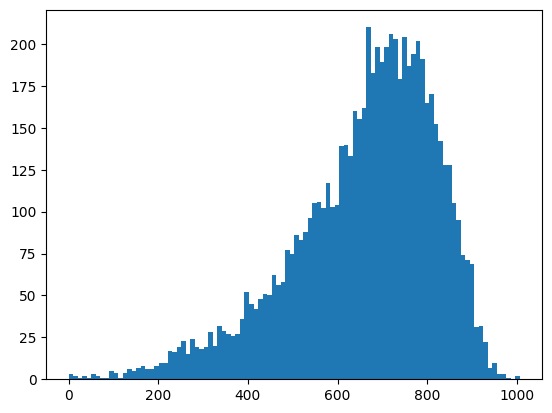

In [28]:
plt.hist(lengths, bins=100)

In [131]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=700)
tokenizer.fit_on_texts(prepro_x_train)
sequences = tokenizer.texts_to_sequences(prepro_x_train)

padded_prepro_x_train = pad_sequences(sequences, padding='post')    ############xtrain

### Modelling

In [136]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=700,
                              output_dim=128,
                              input_length=padded_prepro_x_train.shape[1]),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(onehot_encoded_y_train.shape[1], activation='softmax')
])

In [177]:
from tensorflow.keras.metrics import Precision
#from tensorflow.keras.optimizers import SGD
#optimizer = SGD(learning_rate=0.2)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=[Precision()],
              )

In [179]:
model.fit(padded_prepro_x_train, onehot_encoded_y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
174/174 [==============================] - 6s 37ms/step - loss: 2.2804 - precision_2: 0.0000e+00 - val_loss: 2.2789 - val_precision_2: 0.0000e+00
Epoch 2/100
174/174 [==============================] - 5s 30ms/step - loss: 2.2803 - precision_2: 0.0000e+00 - val_loss: 2.2790 - val_precision_2: 0.0000e+00
Epoch 3/100
174/174 [==============================] - 4s 26ms/step - loss: 2.2802 - precision_2: 0.0000e+00 - val_loss: 2.2786 - val_precision_2: 0.0000e+00
Epoch 4/100
174/174 [==============================] - 5s 31ms/step - loss: 2.2801 - precision_2: 0.0000e+00 - val_loss: 2.2791 - val_precision_2: 0.0000e+00
Epoch 5/100
174/174 [==============================] - 6s 34ms/step - loss: 2.2803 - precision_2: 0.0000e+00 - val_loss: 2.2789 - val_precision_2: 0.0000e+00
Epoch 6/100
174/174 [==============================] - 5s 27ms/step - loss: 2.2804 - precision_2: 0.0000e+00 - val_loss: 2.2790 - val_precision_2: 0.0000e+00
Epoch 7/100
174/174 [==============================]

#### Evaluation

**Evaluation metric:**
Precision

In [101]:
test_data = pd.concat([x_test, y_test], axis = 1)

In [102]:
prepro_testdata = CustomTransformer().transform(test_data)

In [103]:
prepro_x_test = prepro_testdata['posts'].tolist()
prepro_y_test = prepro_testdata['type'].tolist()

In [144]:
test_sequences = tokenizer.texts_to_sequences(prepro_x_test)
padded_test_sequences = pad_sequences(test_sequences, padding='post', maxlen=padded_prepro_x_train.shape[1])

In [180]:
preds = model.predict(padded_test_sequences)

55/55 [==============================] - 1s 12ms/step


In [181]:
preds[0:5]

array([[0.0208876 , 0.07980005, 0.02610572, 0.0784499 , 0.00539159,
        0.00575486, 0.00528772, 0.01094582, 0.17148922, 0.20820916,
        0.13086264, 0.14802368, 0.01686601, 0.03026062, 0.02349835,
        0.03816703],
       [0.0208876 , 0.07980005, 0.02610572, 0.0784499 , 0.00539159,
        0.00575486, 0.00528772, 0.01094582, 0.17148922, 0.20820916,
        0.13086264, 0.14802368, 0.01686601, 0.03026062, 0.02349835,
        0.03816703],
       [0.0208876 , 0.07980005, 0.02610572, 0.0784499 , 0.00539159,
        0.00575486, 0.00528772, 0.01094582, 0.17148922, 0.20820916,
        0.13086264, 0.14802368, 0.01686601, 0.03026062, 0.02349835,
        0.03816703],
       [0.0208876 , 0.07980005, 0.02610572, 0.0784499 , 0.00539159,
        0.00575486, 0.00528772, 0.01094582, 0.17148922, 0.20820916,
        0.13086264, 0.14802368, 0.01686601, 0.03026062, 0.02349835,
        0.03816703],
       [0.0208876 , 0.07980005, 0.02610572, 0.0784499 , 0.00539159,
        0.00575486, 0.00528772, 

In [196]:
import numpy as np
threshold = 0.2
binary_preds = np.where(preds >= threshold, 1, 0)

In [197]:
binary_preds[0:20]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0,

In [184]:
integer_encoded = label_encoder.fit_transform(prepro_y_test)

integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded_y_test = onehot_encoder.fit_transform(integer_encoded)      ###############y test

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [185]:
onehot_encoded_y_test[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [198]:
from sklearn.metrics import precision_score

precision = precision_score(onehot_encoded_y_test, binary_preds, average='micro')
print("Precision:", precision)

Precision: 0.2132564841498559
